# Predictive Modeling of Hospital Length of Stay and Discharge Type
# [Step 4: Explore merged data set]

## 1. Import libraries and load dataset

In [2]:
# Import data manipulation library
import pandas as pd
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set data path 
merged_data_path = "/home/anna/Desktop/Master_thesis/output_data/merged_data"  

# Load merged dataset
merged_data = pd.read_csv(merged_data_path)

In [6]:
merged_data.head()

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
0,1,171465,Entlassung,f,73,28,A04.70,Infectious diseases,10.0,NaN,...,13.2,18.3,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,333396,Entlassung,f,73,34,K57.22,Digestive diseases,19.0,93.0,...,11.6,18.8,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,27091,Entlassung,m,51,13,T84.5,Injury & poisoning,NaN,NaN,...,14.0,18.9,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,36154,Entl.ext.Instit,m,50,12,I21.4,Circulatory diseases,38.0,58.0,...,12.7,14.4,131.0,367.0,NaN,4.5,NaN,NaN,NaN,NaN
4,2,142617,Entl. in ex.KH,m,51,1,T84.5,Injury & poisoning,15.0,65.0,...,19.2,17.6,159.0,NaN,NaN,5.2,NaN,NaN,NaN,NaN


## 2. General statistics

### 2.1 Patients and cases

In [8]:
print(f"Number of unique patients: {merged_data['patient_id'].nunique()}\n")

print(f"Number of unique cases: {merged_data['case_id'].nunique()}")

Number of unique patients: 151389

Number of unique cases: 268987


In [ ]:
# Count the number of cases per patient
case_counts = merged_data.groupby('patient_id')['case_id'].nunique()

case_counts.describe()

In [ ]:
# Filter the patients with more than 2 cases
patients_with_more_than_2_cases = case_counts[case_counts > 2]

# Get the number of such patients
num_patients_more_than_2 = patients_with_more_than_2_cases.count()

# Get the total number of patients
total_patients = case_counts.count()

# Calculate the percentage of patients with more than 2 cases
percentage_patients_more_than_2 = (num_patients_more_than_2 / total_patients) * 100

# Print the results
print(f"Number of patients with more than 2 cases: {num_patients_more_than_2}")
print(f"Percentage of patients with more than 2 cases: {percentage_patients_more_than_2:.2f}%")

Number of patients with more than 2 cases: 24752
Percentage of patients with more than 2 cases: 16.35%


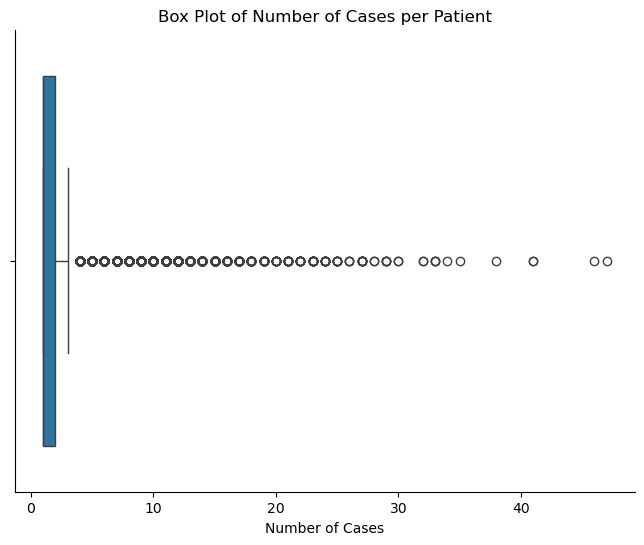

In [29]:
# Box plot for number of cases per patient
plt.figure(figsize=(8, 6))
sns.boxplot(x=case_counts)
# Remove top and right spines
sns.despine()
plt.title('Box Plot of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.show()

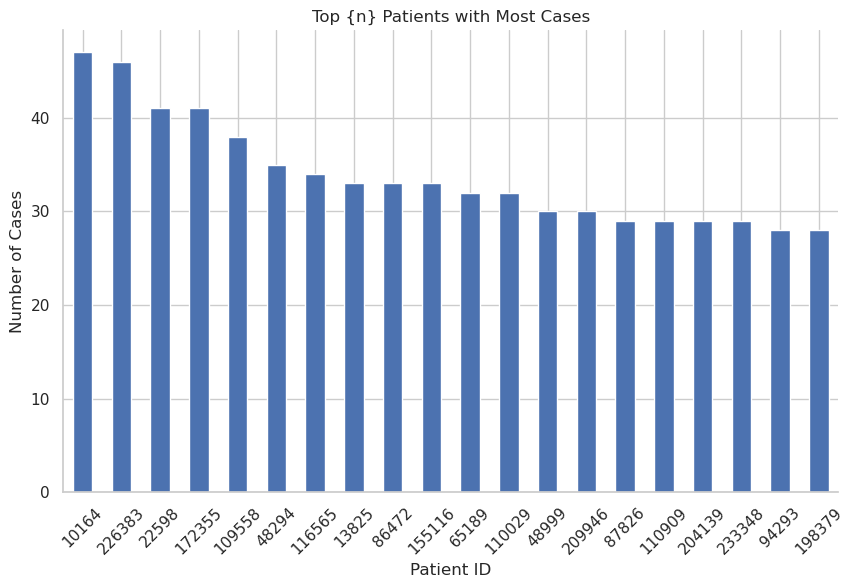

In [51]:
# Get the top n patients with the most cases
n = 20 # Define number of top n patients
top_n_patients = case_counts.nlargest(n)

# Bar plot for top N patients
plt.figure(figsize=(10, 6))
top_n_patients.plot(kind='bar')
sns.despine()
plt.title('Top {n} Patients with Most Cases')
plt.xlabel('Patient ID')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Display the patient with the highest number of cases
merged_data[(merged_data['patient_id'] == 10164)].sort_values(by='age')

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
10767,10164,4059,Entlassung,m,60,17,D59.1,Blood & immune disorders,23.0,79.0,...,NaN,19.7,200.0,33.56,NaN,7.5,NaN,NaN,NaN,NaN
10809,10164,335009,Entlassung,m,60,4,J18.8,Respiratory diseases,89.0,68.0,...,NaN,18.4,208.0,NaN,NaN,7.2,NaN,NaN,NaN,144.0
10805,10164,319876,Entlassung,m,60,12,D59.0,Blood & immune disorders,14.0,74.0,...,NaN,18.6,255.0,NaN,NaN,7.3,NaN,NaN,NaN,129.0
10798,10164,272768,Entlassung,m,60,5,R50.80,Symptoms & abnormal findings,30.0,62.0,...,NaN,20.6,163.0,35.28,NaN,8.4,NaN,NaN,NaN,115.0
10793,10164,260545,Entlassung,m,60,9,J18.8,Respiratory diseases,26.0,71.0,...,NaN,19.3,213.0,23.82,NaN,7.9,NaN,NaN,NaN,NaN
10774,10164,77986,Entlassung,m,60,1,J44.81,Respiratory diseases,32.0,78.0,...,NaN,18.2,211.0,NaN,NaN,8.2,NaN,NaN,NaN,NaN
10790,10164,239583,Entlassung,m,60,4,J44.01,Respiratory diseases,24.0,74.0,...,NaN,17.7,259.0,19.84,NaN,5.4,NaN,NaN,NaN,NaN
10773,10164,77298,Entlassung,m,60,7,M05.80,Musculoskeletal diseases,36.0,81.0,...,NaN,19.6,224.0,NaN,NaN,10.1,NaN,NaN,NaN,NaN
10771,10164,47245,Entlassung,m,61,5,J44.01,Respiratory diseases,16.0,53.0,...,NaN,19.0,206.0,NaN,NaN,5.0,NaN,NaN,NaN,100.0
10789,10164,217298,Entlassung,m,61,5,M05.99,Musculoskeletal diseases,32.0,72.0,...,NaN,18.6,242.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN


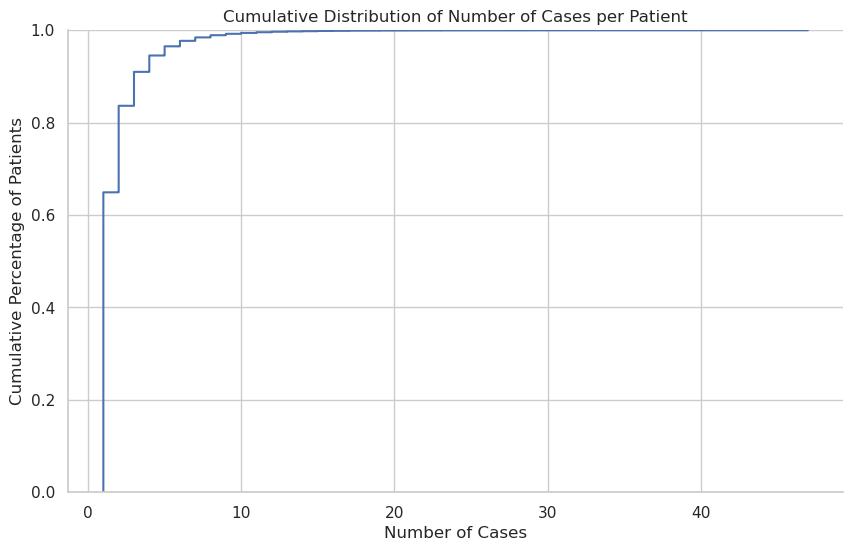

In [52]:
# Cumulative distribution plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(case_counts)
sns.despine()
plt.title('Cumulative Distribution of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.ylabel('Cumulative Percentage of Patients')
plt.show()


### 2.2 Demographic statistics

In [36]:
sex_counts = merged_data['sex'].value_counts()

# Calculate the percentage
sex_percentage = (sex_counts / sex_counts.sum()) * 100

# Print the results
print(f"Number of Men: {sex_counts.get('m', 0)}")
print("Percentage of Men: {:.2f}%".format(sex_percentage.get('m', 0)))
print(f"\nNumber of Women: {sex_counts.get('f', 0)}")
print("Percentage of Women: {:.2f}%".format(sex_percentage.get('f', 0)))

Number of Men: 143909
Percentage of Men: 53.50%

Number of Women: 125078
Percentage of Women: 46.50%


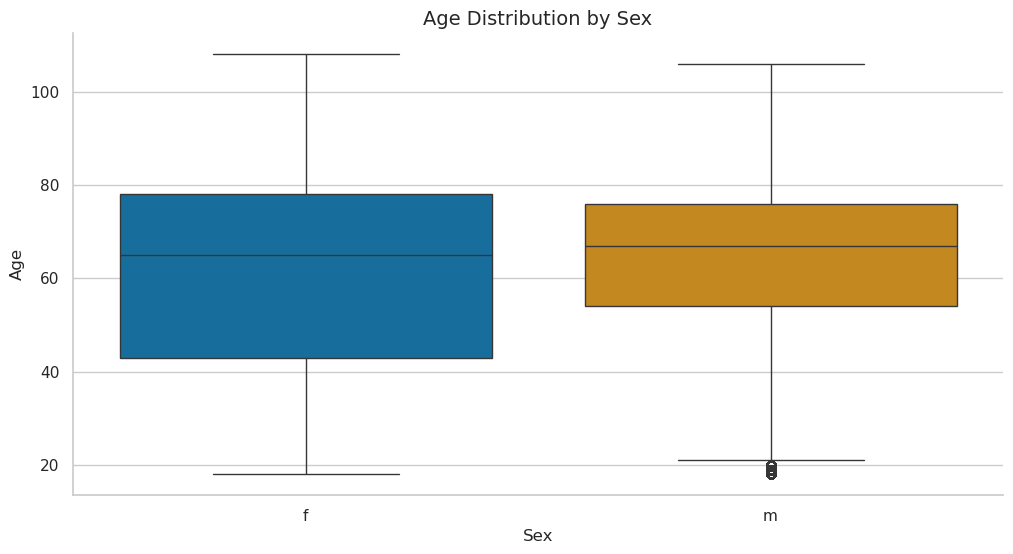

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="sex", y="age", data=merged_data, hue="sex", palette="colorblind")
sns.despine()
plt.xlabel("Sex", fontsize=12, fontweight="normal")
plt.ylabel("Age", fontsize=12, fontweight="normal")
plt.title("Age Distribution by Sex", fontsize=14, fontweight="medium")
plt.show()

### 2.3 Discharge type and relation with LOS and diagnosis

In [50]:
# Distribution of Discharge Type
discharge_counts = merged_data['discharge_type'].value_counts()
discharge_percentage = discharge_counts / discharge_counts.sum() * 100

# Create a DataFrame to display both counts and percentages
discharge_stats = pd.DataFrame({
    'Count': discharge_counts,
    'Percentage (%)': discharge_percentage
})

display(discharge_stats)

,Count,Percentage (%)
discharge_type,,
Entlassung,193366,71.886745
Entl.ext.Instit,31827,11.832170
Entl. in ex.KH,31767,11.809864
Verstorben,6835,2.541015
Entl. Tarifbere,3367,1.251733
Entl.eigner Wun,1704,0.633488
Wartepat. Entl.,96,0.035689
Ambulanz exInst,20,0.007435
Rückv n. ambBeh,3,0.001115


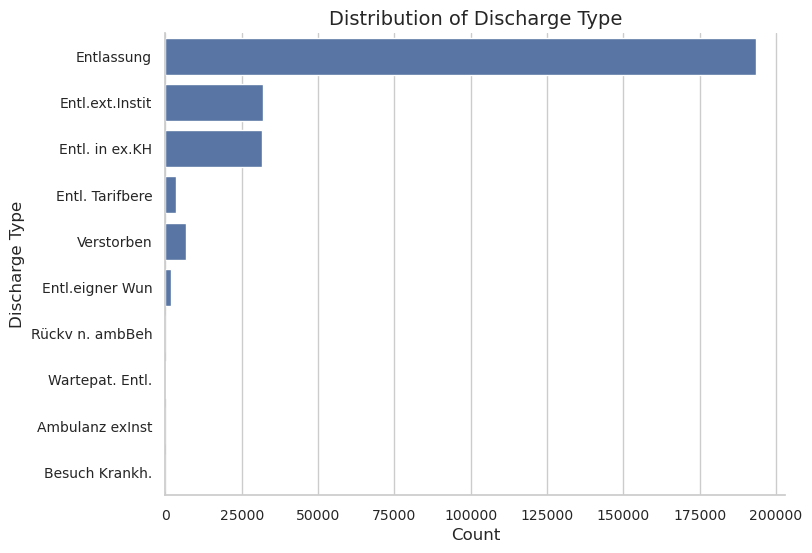

In [67]:
# Plot the distribution of Discharge Type
plt.figure(figsize=(8, 6))
sns.countplot(y='discharge_type', data=merged_data)
plt.title('Distribution of Discharge Type', fontsize=14)
plt.ylabel('Discharge Type', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()


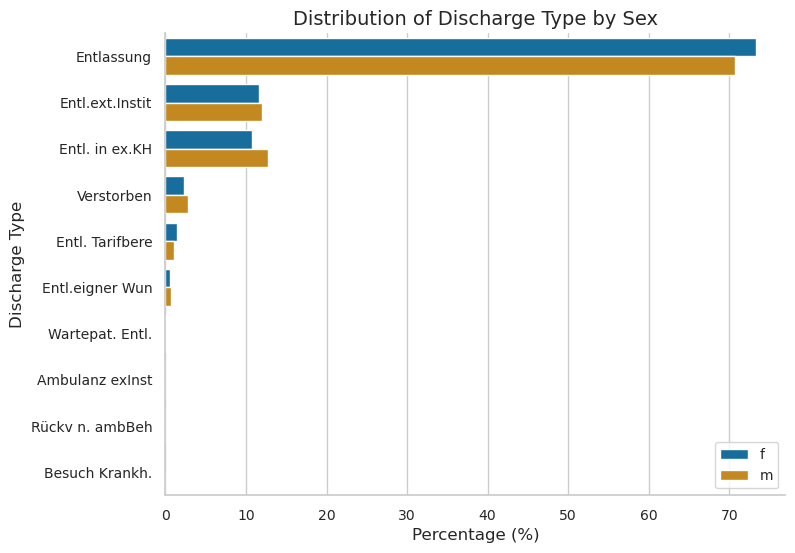

In [ ]:
# Calculate the count of each discharge type by sex
discharge_counts_by_sex = merged_data.groupby(['sex', 'discharge_type']).size().reset_index(name='count')
# Calculate the total count of each sex group
total_counts_by_sex = discharge_counts_by_sex.groupby('sex')['count'].transform('sum')
# Compute the percentage for each discharge type within each sex group
discharge_counts_by_sex['percentage'] = (discharge_counts_by_sex['count'] / total_counts_by_sex) * 100
# Sort discharge types by the total count
discharge_type_order = discharge_counts_by_sex.groupby('discharge_type')['count'].sum().sort_values(ascending=False).index

# Plot the distribution of discharge type by sex, sorted by frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='percentage', y='discharge_type', hue='sex', data=discharge_counts_by_sex, palette='colorblind', order=discharge_type_order)
plt.title('Distribution of Discharge Type by Sex', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Discharge Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=10)
sns.despine()
plt.show()



### 2.4 Laboratory tests statistics